Источники:
+ https://contest.yandex.ru/contest/28416/problems/A/
+ https://contest.yandex.ru/yacup/contest/42227/problems/
+ https://contest.yandex.ru/contest/39210/problems

# A. Довольные аналитики

В Яндексе есть два аналитика — Ян и Петр. Каждый день они берутся за новую задачу. Ян получает удовольствие от работы, если сделал 2 задачи подряд успешно. А Петр — только когда после проваленной задачи в следующей добился успеха.

На сколько дней в среднем Яну ждать первого удовольствия дольше, чем Петру (успех и провал по каждой задаче равновероятны)?

---

Мат. ожидание первого удовольствия для Яна:
$$E(d|Ян)=\sum_{d=1}^{\infty}{d \cdot  p(d|Ян)}$$

Мат. ожидание первого удовольствия для Петра:
$$E(d|Пётр)=\sum_{d=1}^{\infty}{d \cdot  p(d|Пётр)}$$

Мат. ожидание разности дней:
$$E(x) = E(d|Ян) - E(d|Пётр)$$
где $p(d|Пётр)$ и $p(d|Ян)$ - вероятности для Петра и Яна, что удовольствие наступит на день $d$

📌Вероятность удовальствия подсчитаем как отношение кол-ва комбинаций, благоприятсвующих первому успешному удовальсвию, к общему кол-ву комбинаций. Всего успешных комбинаций можно подсчитать через кол-во размещений с повтором из 2 событий (успех, провал) по кол-ву дней $d$ равное $2^{d}$.

In [1]:
import itertools

In [2]:
def enjoyment(n: int, patern: str) -> int:
    """
    Считает кол-во комбинаций, удовлетворяющих услововию 
    получения первого удовольствия.
    n - кол-во дней, минимум 2
    patern - для Яна '++', для Петра '-+'
    """
    count = 0
    for seq in itertools.product('+-', repeat=n):
        if seq[-2] + seq[-1] != patern:
            continue

        for i in range(n-2):
            if seq[i] + seq[i+1] == patern:
                break
        else:
            count += 1
#             print(seq)
    return count       
        

In [3]:
k = 15
print('День |Вариантов успешых комбинаций')
print(f'{" ":<5}|{"-"*30}')
print(f'{" ":<5}|{"Ян":>7}|{"Пётр":>7}')
print('-'*36)
for i in range(2, k+1):
    d_yn =  enjoyment(i, '++')
    d_petr =  enjoyment(i, '-+')
    print(f'{i:<5}|{d_yn:7}|{d_petr:7}')
   

День |Вариантов успешых комбинаций
     |------------------------------
     |     Ян|   Пётр
------------------------------------
2    |      1|      1
3    |      1|      2
4    |      2|      3
5    |      3|      4
6    |      5|      5
7    |      8|      6
8    |     13|      7
9    |     21|      8
10   |     34|      9
11   |     55|     10
12   |     89|     11
13   |    144|     12
14   |    233|     13
15   |    377|     14


📌 Эмпирическим путём для первых $k$ дней, начиная со 2 (с 1), можно вывести закономерность - для Петра кол-во комбинаций благоприятсвующих первому удовольствию соостветсвует $d-1$, где $d$ - порядковый номер дня. Для Яна соответсвует числам Фибоначчи, где $n = d-1$ - $n$-ый член [последовательности Фибоначчи](https://translated.turbopages.org/proxy_u/en-ru.ru.66a57d10-63692124-418c8277-74722d776562/https/en.wikipedia.org/wiki/Fibonacci_Number) $F_{n}$

$$p(d|Пётр)=\frac{d-1}{2^{d}}\Rightarrow E(d|Пётр)=\sum_{d=1}^{\infty}{d \cdot  \frac{d-1}{2^{d}}}$$
$$p(d|Ян)=\frac{F_{d-1}}{2^{d}}\Rightarrow E(d|Ян)=\sum_{d=1}^{\infty}{d \cdot  \frac{F_{d-1}}{2^{d}}}$$

📌Сумма ряда представляет собой бесконечно убывающую геометрическую прогрессию со знаменателем прогресии $q=\frac{1}{2}$

## Бесконечно убывающая геометрическая прогрессия
$$b_{n} = b_{1}\cdot q^{n-1}$$
Сумма ряда бесконечно убывающей геом. прогрессии:   
$$S = \frac{b_{1}}{1-q}$$
где $b_{1}$ - 1-ый член ряда, при $0<q<1$ - знаменатель прогрессии

Примеры решений:
+ [youtube: Найти сумму числового ряда n/2^n, n/3^n, n^2/2^n](https://www.youtube.com/watch?v=wybdUOEeOAI)
+ [youtube: Сумма ряда с числами Фибоначчи](https://www.youtube.com/watch?v=7MQddKDLJQA)

В общем виде Пётр:
$$\sum_{d=1}^{\infty}{\frac{d\cdot(d-1)}{2^{d}}}=\sum_{d=1}^{\infty}{d\cdot(d-1)\cdot x^{d}}=\sum_{d=1}^{\infty}{d^2\cdot x^{d}} - \sum_{d=1}^{\infty}{d\cdot x^{d}} = \frac{x\cdot (1+x)}{(1-x)^3} - \frac{x}{(1-x)^2} = \frac{2x^2}{(1-x)^3}=4 \mid x=\frac{1}{2}$$

Фибоначчи:
$$\sum_{d=1}^{\infty}{F_{d}\cdot x^{d}}= \frac{x}{1-x-x^2}$$
В общем виде Ян:
$$\sum_{d=1}^{\infty}{\frac{d \cdot F_{(d-1)}}{2^{d}}}=\sum_{d=1}^{\infty}{d \cdot F_{(d-1)}}\cdot x^{d}=\frac{x^2\cdot (2-x)}{(1-x-x^2)^2}=6\mid x=\frac{1}{2}$$

Ответ:
$$E(x) = E(d|Ян) - E(d|Пётр)=6-4=2$$

# B. Ювелирная работа
Ювелир получил заказ на жемчужную нить. Для работы он заказал 1150 жемчужин. Так как опытный мастер знает, что среди них может встречаться брак (слишком маленькие жемчужины или со сколами), он заказал на 15% больше, чем необходимое количество. Когда он получил посылку с жемчугом, он решил проверить, достаточно ли красивых и качественных жемчужин для выполнения заказа. Для этого он доставал случайную жемчужину, проверял ее на соответствие размеру и качество перламутра, затем клал обратно. Такую процедуру он проделывал K раз, и каждый раз оказывалось, что жемчужина была подходящей. Какое минимальное K может гарантировать, что жемчуга ювелиру хватит для выполнения своей работы с вероятностью не меньше 95%, если считать, что доля качественных жемчужин априори распределена равномерно?

---
## Решение через объем выборки
[Расчет необходимой численности выборки](http://primer.by/student/obschaja-teorija-statistiki/vyborochnoe-nabljudenie/raschet-neobhodimoj-chislennosti-vyborki/)

In [4]:
import math

In [5]:
def number_of_sample(z, p, error):
    return z ** 2 * p * (1 - p) / error ** 2

In [7]:
k = number_of_sample(z=1.96, p=0.15, error=0.15)
k

21.769066666666667

## Решение через схему Бернулли
[Как найти вероятность появления
хотя бы одного события/объекта](https://www.matburo.ru/tvart_sub.php?p=art_h1)

Заказывая на 15% больше жемчуга, чем требуется, мастер тем самым раcсчитывет на максимальную вероятность брака 150/1150. Теперь если рассчитать кол-во жемчуга, которое нужно проверить, чтобы попался хотя бы один брак с заданной гарантированной вероятностью и выбранной вероятностью брака, то получим значение кол-ва проверок для вытаскивания хотя бы 1 брака. То есть, если при проверках вытащим брак, не дойдя до требуемого числа проверок, то значит на самом деле в партии вероятность брака оказалось больше, чем выбранная максимальная вероятность брака.

In [8]:
def at_least_one(garant_propability, p):
    return math.log(1-garant_propability, 1-p)

In [9]:
N = 1150
defect = 15

n_good = N * 100 / (100 + defect)
p_good = n_good / N
p_defect = 1 - p_good

Хотя бы одна деталь бракована с вероятностью 95%

In [12]:
k = at_least_one(garant_propability=0.95, p=p_defect)
k

21.43453520066741

Округляем в меньшую сторону, так как задача обратная (все небракованные)

Ответ: 21

In [13]:
# увеличим вероятность брака
k = at_least_one(garant_propability=0.95, p=p_defect+0.01)
k

19.796209667506826

Если в партии на самом деле вероятность брака p_defect+0.01, то на 20 проверке с вероятностью 95% обнаружим брак и значит, не хватит качественных жемчугов.

Практический смысл.

1. Определяем максимальную вероятность брака, которая нас устраивает.
2. Заказываем продукцию с учетом процента брака из предыдущего пункта.
3. Чтобы не проверять каждую полученную продукцию на качество, рассчитываем кол-во проверок при заданной вероятности брака и гарантированной точностью.
4. Начинаем проверки:
+ Если обнаружили брак на проверке номер i < требуемое число проверок, то с гарантированной точностью, текущая вероятность брака в партии превышает допустимый порог брака. -> дозаказываем продукцию
+ Если брак не обнаружили при проверках, то вероятность брака в партии меньше или равна выбранной максимальной вероятности брака. -> радуемся
5. Сэкономили время на проверку каждой продукции

# C. Шифр

Антон прислал своему другу Арсению файл с зашифрованным содержимым и просьбой расшифровать его.

Вместе с файлом было зашифрованное сообщение следующего вида: “уцмуьмвя ъэуопшйв ъэуеэвййацчуь цуцчуач ь чуй, щчу аё ужаоиа мшьузйулму ъэшюневювчд“

В ответ необходимо вписать расшифровку короткого сообщения. Все буквы в послании должны быть строчные.

[Скачать данные](https://contest.yandex.ru/contest/39210/download/C/)

---

In [161]:
with open('data/encoded.txt', encoding='utf-8') as f:
    data = f.readlines()
    
print("Кол-во строк:", len(data))    
print(data[:2])

Кол-во строк: 284
['мвцчвпу нчэу, а зупучсш опаиа йупуюуеу цупмрв звъпяцвпа мв шюьв звйшчмсё ьупмвё цъуиубмуеу йуэя.\n', 'ь йапш уч ошэшев ц эсоупуьмуеу цнюмв звоэуцапа цшча ц ъэайвмиуб, ьшцчд уо фчуй йемуьшмму юумшцпвцд юу цчва, улаювьжшб звьчэвив, а ьуч нлш чсцящв щвши цпшчшпвцд и цнюмн, щчуос ёачэуцчдх апа цапуб юуосчд иэуёа ъаыа. шыш уюам ёпуъучпаьсб юшмд ьцчнъап ь цьуа ъэвьв.\n']


Сначала было предположение, что используется шифр Цезаря. Расшифровка по Цезарю ни к чему не привела.

📌 Далее было решено найти в тексте:
+ слова с дефисом (в надежде найти слова по типу кто-то, что-нибудь)
+ двойные буквы (нн, cc, ...)
+ буква перед двойными буквами (в надежде найти Енн)

И от этого оталкиваться...

In [48]:
from collections import Counter

In [60]:
data_tokens = list(map(str.split, data))

# слова с дефисом
defis = Counter()
for line in data_tokens:
    for tok in line:
        if '-' in tok:
            parts = tok.split('-')
            defis[parts[-1]] += 1
            print(tok)

уюму-шюамцчьшммуш
щнчд-щнчд…
ивиуб-маонюд
ъуцпнжвб-ив,
юлумвчвм-щвбив
еюш-чу
щчу-чу
щчу-чу,
иуеюв-чу
ьцш-чвиа
ьцш-чвиа
ъячд-жшцчд
аз-зв
ьцш-чвиа
щвбиа-шюамуйсжпшммаиа.
ивиуш-чу
мвиумшр-чу
ивиуб-чу
уюмв-юьш
еюш-маонюд
ичу-маонюд
ививя-чу
иуеюв-маонюд
в-в-в!
ичу-чу
щвэпдз-эупвмю
щчу-чу
ивиайа-чу
щвэпдзв-эупвмюв!
уюму-шюамцчьшммуш
ъу-йушйн,
ичу-маонюд
иуш-щчу,
ьцш-чвиа
ивиуйн-чу
цчэвммуйн-цчэвммуйн
ивиуш-маонюд
щнчд-щнчд
иви-чу
ювьмсй-ювьму
ивиай-чу
иуш-ивиаш


In [62]:
defis.most_common(10)

[('чу', 13),
 ('маонюд', 6),
 ('чвиа', 4),
 ('шюамцчьшммуш', 2),
 ('щнчд…', 1),
 ('ив,', 1),
 ('щвбив', 1),
 ('чу,', 1),
 ('жшцчд', 1),
 ('зв', 1)]

📌 "чу" - самое частое употребление, предположительно это "то"

📌 Дальнейший анализ слов с дефисом помог расшифровать ещё часть букв например "где-нибудь, кто-то, что-то"

In [49]:
# двойные буквы
double = Counter()

for line in data_tokens:
    for tok in line:
        for i, el in enumerate(tok[:-1]): 
            if tok[i] == tok[i+1]:
                print(tok)
                double[tok[i]] += 1
                continue

йемуьшмму
ъупулшмаа.
йшюпшмму,
уюму-шюамцчьшммуш
йшюпшммшш,
йшюпшммшш,
йшюпшммшш
йшюпшммшш
ъуеэнлшмаа
юпаммуб
ьцъшмшммуб
шцчшцчьшмму,
мшъэшйшмму
шш
ошццйсцпарв,
мвъэялшммсш
ььшэё,
ьуццчвмуьачд
ььшэё
ьзкшэужшммсё
ъупулшмаа
ъупулшмаа.
пнммуй
азуюэвммсш
оупшш
ошзнйаа.
уччупимнпця
фмшэеащмшш
йвццуб
осцчэшш!
ъэумшцця
чшэяя
нэвевммсй
эвццьшчш
ъшэшюмхх
осцчэшш.
йаппаум
мшзвйнчмшммвя
йемуьшммвя
эвццчуямаа
эвццчуямаа
ацчуэаа
звйшюпшммнх
аййшпдйвм,
ъупмшш
онюнышш
чуэлшцчьшмму.
цуъпшйшммаиуь.
ошзучьшчцчьшммуцчдх,
чуэлшцчьшммвя
ошзучьшчцчьшммуцчд
ошзучьшчцчьшммуцчд?
оупшш
ьшпащшцчьшммсй
цвйууопвювмашй
въъшчачмсё
шш
нюаьачшпдмшш
мшазйшмму
цуёэвмяя
эвццчуямаш
юацчвмраа,
уюмуьэшйшмму
йшюпшмму!
цуёэвмяя
юпаммнх
звйшюпшммнх
уюмуьэшйшмму
ньшэшмму.
йемуьшмму.
ььсцд
эвццчвпця
ъуцчшъшмму
цчэвмму,
осцчэшш,
ошзниуэазмшмму
учъупаэуьвммсш
осцчэшш
эвццчнъапацд,
азэшзвммуйн
аземвммаиуй.
юпаммсй,
юпаммсй,
йшмяя
щвбиа-шюамуйсжпшммаиа.
цпулшммсйа
цвппаьвм,
ошззьнщму,
чшпшъвчаа
цвппаьвм
эшющвбжшш
йшюпшмму.
эвццивзвч

In [63]:
double.most_common(10)

[('м', 128),
 ('ш', 38),
 ('ц', 25),
 ('а', 17),
 ('п', 15),
 ('ь', 8),
 ('я', 7),
 ('ъ', 4),
 ('й', 3),
 ('у', 3)]

📌 "м" - предположительно "н", в суфффиксах "онн, енн"

In [90]:
# буква до двойных букв
before_double = Counter()

for line in data_tokens:
    for tok in line:
        for i, el in enumerate(tok[:-1]): 
            if tok[i] == tok[i+1] and tok[i] == 'м':
                print(tok)
                before_double[tok[i-1]] += 1
                continue

йемуьшмму
йшюпшмму,
уюму-шюамцчьшммуш
йшюпшммшш,
йшюпшммшш
юпаммуб
ьцъшмшммуб
шцчшцчьшмму,
мшъэшйшмму
мвъэялшммсш
ьзкшэужшммсё
пнммуй
азуюэвммсш
нэвевммсй
мшзвйнчмшммвя
йемуьшммвя
звйшюпшммнх
чуэлшцчьшмму.
цуъпшйшммаиуь.
ошзучьшчцчьшммуцчдх,
чуэлшцчьшммвя
ошзучьшчцчьшммуцчд
ошзучьшчцчьшммуцчд?
ьшпащшцчьшммсй
мшазйшмму
уюмуьэшйшмму
йшюпшмму!
юпаммнх
звйшюпшммнх
уюмуьэшйшмму
ньшэшмму.
йемуьшмму.
ъуцчшъшмму
цчэвмму,
ошзниуэазмшмму
учъупаэуьвммсш
азэшзвммуйн
аземвммаиуй.
юпаммсй,
юпаммсй,
щвбиа-шюамуйсжпшммаиа.
цпулшммсйа
йшюпшмму.
цуепвцуьвммуцчд
цуьшэжшммуб
цуьшэжшммуб
цчэвмму:
ьцшпшммуб,
уъэшюшпшммуш
цчэвммсб
йшюпшмму,
уеэвмащшммсй
звъэуеэвййаэуьвммсё
ацчаммуш
цуьшэжшммуш,
мшмвъацвммуш
уюмуьэшйшмму
улшцчущшмму,
цуьшэжшммсй,
цуьшэжшмму
цчэвмму,
юшэзмуьшммуйн,
ъуцчуямму
ъэаэулюшммсй
цуоцчьшммсё
аземвммаиуй!
шюамцчьшммуш,
ьмнчэшммай
цуьшэжшммуш
аземвммаи!
аземвммаиуй,
йшюпшмму
мшучшцвммсб
ьзкшэужшммсб
звйшюпшммнх
уюаммвюрвчд…
уцуошмму
ньшэшмму,
аземвммаиа,
ньпшщшммсш
цчэвммуб
цуиэуьшммсб
ъ

In [91]:
before_double.most_common(10)

[('ш', 79), ('в', 32), ('а', 12), ('я', 4), ('н', 1)]

📌 "ш" - предположительно "е", в словах с суффиксом "енн"

In [154]:
# словарь расшифровки
d = {'ч': 'т', 
     'у':'о',
     'а':'и',
     'в':'а',
     'д':'ь',
     'е':'г', 
     'и':'к', 
     'м':'н', 
     'н':'у', 
     'о':'б', 
     'щ':'ч', 
     'ш':'е', 
     'ю':'д', 
     'ъ':'п', 
     'э':'р', 
     'ж':'ш', 
     'й':'м', 
     'ц':'с', 
     'ь':'в', 
     'я':'я', 
     'п':'л', 
     'ё':'х', 
     'з':'з', 
     'л':'ж', 
     'с':'ы', 
     'р':'ц', 
     'б':'й', 
     'ф':'э', 
     'х':'ю', 
     'ы':'щ', 
     'т':'ф', 
     'к':'ъ', 
     'г':'ё'}

target = "уцмуьмвя ъэуопшйв ъэуеэвййацчуь цуцчуач ь чуй, щчу аё ужаоиа мшьузйулму ъэшюневювчд"

alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
translator = dict.fromkeys(alphabet, '-')
translator.update(d)

table = str.maketrans(translator)
target.translate(table) 

'основная проблема программистов состоит в том, что их ошибки невозможно предугадать'

In [162]:
# for line in data:
#     print(line.translate(table))

Исходный текст из произведения - "Чайка по имени Джонатан Ливингстон"

# D. Время путешествий

Путешественник Вася выбирает время для поездки в новую страну. Вася считает, что отпуск удался, если за времени поездки температура в стране поднялась, причем чем сильнее она поднимется к отъезду относительно момента приезда, тем лучше. Дан прогноз погоды на некоторый период вперед, нужно указать изменение температуры за лучший для Васи период и лучшие даты (номера дней) приезда и отъезда. Если лучших вариантов несколько, то укажите номера дней самой короткой поездки с ближайшей датой окончания.

**Вывод:** 3 числа, разделенные пробелом: изменение температуры за оптимальный период, номер дня приезда, номер дня отъезда. (нумерация дней от 0)

---

In [163]:
with open('data/input.txt') as f:
    data = list(map(int, f.readline().split()))
print(data)

[15, 25, 13, 15, 12, 16, 20, 22, 11, 22, 13, 24, 23, 21, 20, 19, 18, 19, 22, 22, 22, 23, 23, 25, 26, 27, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 16, 15, 14, 13, 12, 12, 11, 10]


## Оптимальное решение

+ строки - индекс начала
+ столбцы - индекс конца

In [176]:
%%timeit
diff = [[t2-t1 for t2 in data[i+1:]] for i, t1 in enumerate(data[:-1])]

max_rows = [max(row) for row in diff]
max_diff = max(max_rows)

index_rows = [i for i, r in enumerate(max_rows) if r == max_diff]
index_cols = [diff[i].index(max_diff) for i in index_rows]

min_col = min(index_cols)

best_index = index_cols.index(min_col)
best_col = index_cols[best_index]
best_row = index_rows[best_index]

205 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [170]:
print(max_diff, best_row, best_col+best_row+1)

16 8 25


## Решение сочетания+сортировка

In [175]:
%%timeit
weekends = [(i, j, data[j]-data[i])  for i, j in itertools.combinations(range(len(data)), 2)]
start, stop, temp = sorted(weekends, key=lambda x: (x[2], -(x[1]-x[0]), -x[0]), reverse=True)[0]

1.5 ms ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [174]:
print(temp, start, stop)

16 8 25


Изящно, но медленно(

# ~~E. Игра с числами~~

Бока и Жока остались в классе после уроков, и чтобы не терять время впустую, они решили сыграть в интересную игру.

Для начала они выписывают на доске $n$ чисел в ряд. На каждом шаге игрок может выбрать от одного до $m$ чисел из начала последовательности и стереть их. После этого игроку начисляется столько очков, сколько в сумме дают те числа, которые он стёр. Игра продолжается до тех пор, пока на доске все ещё есть числа.

Цель игры — получить в конце сумму очков, превосходящую сумму оппонента. Бока и Жока делают ходы поочередно, и Бока начинает первым. Оба игрока играют оптимально. Гарантируется что ничья невозможна.

**Ввод:** Входные данные состоят из двух строк. В первой строке даны числа $n$ (4≤$n$≤50000) и $m$ (3≤$m$≤100). Во второй строке даны $n$ чисел — числа, записанные на доске. Каждое число во второй строке по модулю не превышает 1000.

**Вывод:** Выведите 1, если победителем окажется Бока. В противном случае, выведите 0.

---

НЕ РЕШЕНА

In [47]:
import random

numbers = [random.randint(-1000, 1000) for _ in range(50000)]

with open('data/game2.txt', 'w') as f:
    f.write(str(len(numbers)) + ' ' + '100' + '\n')
    for el in numbers:
        f.write(str(el))
        f.write(' ')

In [176]:
%%time

with open('data/game.txt') as f:
    for i, line in enumerate(f):
        line = line.strip()
        if i == 0:
            n, m = list(map(int, line.split()))
        data = list(map(int, line.split()))

def get_max_sum(seq):
    s_ = float('-inf')
    idx_ = 0
    for i, _ in enumerate(seq):
        t = sum(seq[:i+1])
        if t > s_:
            s_ = t
            idx = i
    return s_, idx_        

boka = 0
joka = 0
step_boka = True
# print(data)
while data:
#     print(len(data))
    max_index = 0
    max_sum = float('-inf')
    for k in range(1, m+1):
        s, idx = get_max_sum(data[:k])
        s_opponent, idx_opponent = get_max_sum(data[k:k+m])
        if s - s_opponent > max_sum:
            max_sum = s - s_opponent
            max_index = k
            
    
    del data[:max_index] 
  
    if step_boka:
        boka += s
        step_boka = False
    else:
        joka += s
        step_boka = True
        
    
    
print(1 if boka > joka else 0)
print(boka, joka)

1
31 0
CPU times: total: 0 ns
Wall time: 3 ms


In [177]:
%%time

with open('data/game.txt') as f:
    for i, line in enumerate(f):
        line = line.strip()
        if i == 0:
            n, m = list(map(int, line.split()))
        data = list(map(int, line.split()))      

boka = 0
joka = 0
step_boka = True
while data:
    combo = [[(sum(data[:d1]), sum(data[d1:d1+d2])) for d2 in range(1, m+1)] for d1 in range(1, m+1)]
    combo_max = [max(row, key=lambda x: x[1]) for row in combo]
    diff = [s1-s2 for (s1, s2) in combo_max]
    max_diff = max(diff)
    index_max = diff.index(max_diff)
    
    if step_boka:
        boka += sum(data[:index_max+1])
        step_boka = False
    else:
        joka += sum(data[:index_max+1])
        step_boka = True
        
    del data[:index_max+1]    
           
print(1 if boka > joka else 0)
print(boka, joka)

1
26 -14
CPU times: total: 0 ns
Wall time: 3 ms


# F. Футбол

Сотрудники Яндекса любят играть в мини-футбол по выходным. В каждом матче играют две команды по 5 человек. Состав на игру в каждую команду выбирается случайно равновероятно из всех сотрудников Яндекса.

Аркадий ведет статистику всех игр. Он записывает состав каждой команды и финальный счет игры. Кроме этого, он ведет статистику каждого игрока по разнице мячей: каждому игроку матча добавляется разница мячей команды, в составе которой он играл. Разница мячей считается как число голов cвоей команды минус число голов противоположной команды. Изначально статистика по разнице мячей для каждого игрока равна 0.

Помогите Аркадию понять его прогресс в сезоне. После каждого матча нужно посчитать количество игроков с разницей мячей больше, чем у Аркадия.

**Ввод:** 

В первой строке записано два числа: N (10 ≤ N ≤ 10000) - число сотрудников, M (1 ≤ M ≤ 100000) — число футбольных матчей. Затем следуют результаты каждого матча.

В первой строке каждого матча записано два числа, gA, gB (0 ≤ gA, gB ≤ 20) — количество голов, которые забили команды A и B.

Во второй строке каждого матча записаны десять чисел pi (0 ≤ pi < N) — id сотрудников, участвовавших в матче. Первые пять - состав команды A, вторые пять - состав команды B.

Гарантируется, что составы команд для каждого матча выбирались случайно равновероятно.

У Аркадия id всегда равно 0.

**Вывод:** 

Для каждого футбольного матча выведите одно целое число — количество игроков с разницей мячей больше, чем у Аркадия.

---

In [305]:
# создание примера
k = 10000
m = 10000
with open('data/football.txt', 'w') as f:
    f.write(f'{k} {m}\n')
    for _ in range(m):
        ga = random.randint(0, 20)
        gb = random.randint(0, 20)
        n = [str(random.randint(0, k)) for _ in range(10)]
        f.write(f'{ga} {gb}\n')
        f.write(' '.join(n)+'\n')

📌Были трудности с лимитом по времени выполнения программы. Помогли множества

In [306]:
%%timeit
from collections import Counter

staff = Counter()  # счётчик очков игроков
progress = set()  # хранит id игроков, у которых очков больше чем у Аркадия

with open('data/football.txt') as f:
    n, m = map(int, f.readline().split())
    d = dict.fromkeys(range(n), 0)
    staff.update(d)
    
    while m:
        m -= 1
        ga, gb = map(int, f.readline().split())
        players = list(map(int, f.readline().split()))
        diff = ga-gb
        d = dict([(p, diff) if i < 5 else (p, -diff) for i, p in enumerate(players)])
        staff.update(d)

        # Часть кода для ускорения программы
        if 0 not in players:  # Если Аркадий не играл в матче
            greater = set([p for p in players if staff[p] > staff[0]])  # игроки с большим кол-вом очков
            lesser = set([p for p in players if staff[p] <= staff[0]])  # игроки с меньшим кол-вом очков
            progress |= greater  # прибавляем игроков, если их нет
            progress -= lesser  # вычитаем игроков, если они есть
        else:  # Если Аркадий играл в матче
            if d[0] > 0:  # набрал очки
                progress -= {p for p in progress if staff[p] <= staff[0]}
            else:  # потерял очки
                new_players = set(range(1, n)) - progress
                progress |= {p for p in new_players if staff[p] > staff[0]}

#         print(len(progress))
        len(progress) 

399 ms ± 30.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [307]:
print(len(progress))

7180


# G. Экономный инженер

Молодой инженер Сергей решил накопить денег на новую авиамодель. Подсчитав стоимость всех необходимых ему частей и вычтя их из зарплаты, Сергей понял, что в месяц может потратить не больше 10000 монет. Чтобы следить, что он не тратит слишком много, Сергей решил записывать каждый свой расход и считать, сколько у него останется от 10000 монет, если в оставшееся время он будет тратить в минуту столько же, сколько в среднем тратил до сих пор. Помогите Сергею написать программу, которая будет считать это за него.

**Ввод:** 

На вход подаются от 1 до 10000 строк. Каждая строка имеет формат

YYYY-MM-DD hh:mm:ss S

Здесь YYYY-MM-DD - год-месяц-число, когда был расход, hh:mm:ss - час:минута:секунда, когда был расход, S - количество потраченных монет.

Время расхода T изменяется в рамках (2021-01-01 00:00:00 ≤ T ≤ 2021-01-31 23:59:59).

Сумма расхода S - это целое число: 1 ≤ S ≤ 1000.

Строки подаются на вход в порядке не убывания времени расхода.

**Вывод:** 

Для каждой строки на входе необходимо посчитать сумму, которая останется у инженера на момент времени 2021-02-01 00:00:00, если инженер будет в среднем тратить столько же, сколько тратил до момента времени в строке включительно.

Сумму необходимо округлить банковским методом (например, round() в Python 3.7.3) и записать с двумя цифрами после запятой.

---

📌 Замечания:
+ Не обращать внимание на условие "траты в минуты" - делать в секундах
+ Средние траты считаются с начала месяца
+ ВАЖНО, вывод программы должен быть через файл "output.txt" - требование платформы

In [30]:
from datetime import datetime

limit = 10000
format_date = "%Y-%m-%d %H:%M:%S"
finish = datetime.strptime("2021-01-31 23:59:59", format_date)
start = datetime.strptime("2021-01-01 00:00:00", format_date)
money = 0

with open('data/enginer.txt') as f1, open("data/output.txt", 'w') as f2:
    data = f1.readline()
    while data:
        date, expense = data.rsplit(maxsplit=1)
        date = datetime.strptime(date, format_date)
        money += int(expense)

        rest_seconds = (finish - date).total_seconds()
        went_seconds = (date - start).total_seconds() + 1
        result = round(limit - (money + money / went_seconds * rest_seconds), 2)
        print(f"{result:.2f}", file=f2)
        data = f1.readline()

# H. Расселение спортсменок

Спортивная школа по синхронному плаванию «Золотая рыбка» приехала в детский лагерь «Радость» для проведения летних сборов.

Прежде всего вожатым требуется расселить спортсменок по комнатам. Главный тренер предложил для расселения следующее правило: в комнату заселяют всю команду целиком и больше никого другого. Всего приехало n команд спортсменок.

Количество комнат заданной вместимости в лагере ограничено. Определите, получится ли у вожатых расселить детей? 

**Ввод:** В первой строке задано число n – число команд спортсменок. Во второй строке записаны n чисел ai — количество количество спортсменок в i-й команде.

Далее следует число k – количество типов комнат, и k пар вида вместимость комнаты, количество таких комнат.

Все числа во входных данных положительные целые и не превосходят 10000. 

**Вывод:** Выведите Yes, если у вожатых получится расселить спортсменок, и No, если не получится. 

---

In [120]:
import random

n = 5000
k = 5000
with open('data/camp.txt', 'w') as f:
    f.write(f'{n}\n')
    n = [str(random.randint(0, 10000)) for _ in range(n)]
    f.write(' '.join(n)+'\n')
    f.write(f'{k}\n')
    for _ in range(k):
        size = str(random.randint(0, 10000))
        count = str(random.randint(0, 10000))
        f.write(f'{size} {count}\n')

📌 Очереди быстрее списков, если надо удалять элементы

In [135]:
%%time
from collections import Counter, deque

rooms = Counter()  # счётчик комнат с определенной вместительностью

with open('data/camp.txt') as f:
    # загрузка исходных данных
    n = f.readline()
    comands = sorted(deque(map(int, f.readline().split())))
    k = int(f.readline())
    
    while k:
        k -= 1
        capacity, count = f.readline().split()
        rooms[int(capacity)] += int(count)
        
    keys = sorted(list(rooms.keys()))
    # основной цикл
    while comands:
        if not rooms:
            print('No')
            break
            
        command = comands.pop()
        room = keys[-1]

        if room >= command:
            rooms[room] -= 1
            
            if rooms[room] == 0:
                del rooms[room]
                del keys[-1]
        else:
            print('No')
            break
    else:
        print('Yes')

Yes
CPU times: total: 0 ns
Wall time: 2 ms


# I. Найти склад

Торговая сеть «Руки из плеч» состоит из нескольких магазинов-складов. В складской системе учёта они обозначены уникальным целочисленным идентификатором. **N** пар магазинов-складов объединены в кластеры по территориальному принципу.

Периодически нужного товара не оказывается на определенном складе, и тогда товар может быть доставлен с другого склада, но только из своего кластера, т.к. доставка товаров со складов другого кластера нерентабельна.

Напишите программу, которая будет показывать, с какого на какой склад может быть доставлен необходимый товар. 

**Ввод:** Первая строка содержит целое число **N** (0≤**N**≤10^6) — количество связей между складами.

Следующие **N** строк описывают связи между складами. Каждая из них содержит целые числа **Ui** и **Vi** (1≤**Ui**,**Vi**≤10^9) — идентификаторы соединённых складов.

Следующая строка содержит целое число **T** (1≤**T**≤10^3) — количество запросов на доставку товара на склад для доставки покупателю.

Следующие (2⋅**T**) строк описывают запросы. Первая строка каждой пары содержит целые числа **Xi** и **Ki** (1≤**Xi**≤10^9, 1≤**Ki**≤100) — соответственно идентификатор склада, на который нужно доставить товар, и количество складов, содержащих товар. Вторая строка каждой пары содержит **Ki** целых чисел **Yij** (1≤**Yij**≤10^9) — идентификаторы складов с товаром. 

**Вывод:** Для каждого запроса в отдельной строке выведите сначала целое число **Rj** — количество складов, откуда можно доставить товар. Затем выведите **Rj** целых чисел — номера складов, откуда можно доставить товар. Номера складов следует выводить в том порядке, в котором они перечислены в описании соответствующего запроса во входных данных. 

---

Графы:
+ https://pimiento.github.io/python_graphs.html
+ https://medium.com/nothingaholic/depth-first-search-vs-breadth-first-search-in-python-81521caa8f44

📌 Сначала решал через классические графы и алгоритмы DFS или BFS, но таким образом решение по лимиту времени не проходило. Так как сразу даются связи графов, то можно сразу создавать "кластер путей" магазинов, а потом проверять - если ли в кластере со складом куда доставить товар другие склады, у которых есть товар.

In [110]:
%%time

stores = []  # хранит кластеры складов

with open('data/store2.txt') as f:
    n = int(f.readline())
    while n:
        n -= 1
        pair = set(f.readline().split())
        for i, s in enumerate(stores):
            # если есть одинаковые склады, то объединяем их в один кластер
            if s & pair:  
                stores[i] |= pair
                break
        else:
            stores.append(pair)
            
    # TODO Дообъединять кластеры в stores, если есть одинаковые элементы в разных кластерах. 
    # Хотя тесты и так пройдены        
                    
    t = int(f.readline())
    while t:
        t -=1
        target, k = f.readline().split()
        stores_with_target = f.readline().split()
        
        for cluster in stores:
            if target in cluster:
                break
        results = [s for s in stores_with_target if s in cluster]
        print(len(results), " ".join(results)) 

2 75243921 92142380
2 92142380 97698445
2 92142380 97698445
2 92142380 97698445
CPU times: total: 0 ns
Wall time: 2 ms


# J. Лавки в одномерном городе

Расположить Яндекс.Лавки в новом городе -– задача не простая. Но мы решили быть хитрее и стали доставлять продукты за 15 минут в том числе и в одномерных городах! Причеём не в простых, а в матстатистических. Это такие города, в которых распределение целевой аудитории идеально подчиняется законам математической статистики. А каждая Лавка в них имеет ширину обслуживания 200 условных единиц (100 влево и 100 вправо).

Например, в городе Тестовском целевая аудитория Лавки идеально расположена в зоне нормального распределения:

![1](https://contest.yandex.ru/testsys/markdown-image?code=eyJwYXRoIjoidGVzdF9sYXZrYV92My5wbmciLCJwcm9ibGVtSWQiOiIxOTYzMzMzLzIwMjJfMTBfMDcvY0Y4UVpadTRiOSIsInNpZ24iOiI1ODZlYzRlY2Q2ZTk5MWI4ODU0ZDFmZTE0OWFmNjUxNmY5MDQyY2M3ZjQ4NmJjYWM5YjA0ZmNlZGFmYjUzOTQ4In0=)

Здесь всё просто: стоит поставить Лавку прямо в центре нормального распределения (координата 300), и тогда мы покроем максимальный объем целевой аудитории (~0.558 млн. потенциальных клиентов).

Но бывают города посложнее... Например, Продовский. В нем целевая аудитория рассредоточена в виде сразу нескольких нормальных распределений. Точнее, в виде максимума их плотностей (см. картинки).

![2](https://contest.yandex.ru/testsys/markdown-image?code=eyJwYXRoIjoicHJvZF9zbWFsbF92Ny5wbmciLCJwcm9ibGVtSWQiOiIxOTYzMzMzLzIwMjJfMTBfMDcvY0Y4UVpadTRiOSIsInNpZ24iOiIxMjljNDBjZTBjMWUzOWNlZmFlYzA5OTBkMWYzYmJhZTU0NzM3NGUyMjJlYzE5ZDUyMzViNzdjNmQ1OWM3MjIzIn0=)

![3](https://contest.yandex.ru/testsys/markdown-image?code=eyJwYXRoIjoicHJvZF9zdHJ1Y3R1cmVfdjEyLnBuZyIsInByb2JsZW1JZCI6IjE5NjMzMzMvMjAyMl8xMF8wNy9jRjhRWlp1NGI5Iiwic2lnbiI6IjkwYjgxNDE2NjRiMTg4YjM0M2FkMTQ5N2E4ZWNjZjgwNDc4MjIyZTNiYzFmOGYxY2Q3NDIyNzhmYTRlYmJkM2MifQ==)

Мы хотим открыть в Продовском две Яндекс .Лавки, c неперекрывающимися зонами, каждая из которых будет покрывать 200 условных единиц (100 влево и 100 вправо). Естественно, мы хотим покрыть как можно большую часть целевой аудитории. Определите, в каких целых точках Продовского будет оптимально открыть Лавки.

В качестве ответа введите два целых числа (координаты Лавок), от меньшего к большему, через пробел.

---

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [179]:
def norm(x, m, s):
    """Ф-ция плотности нормального распределения"""
    return 1 /(s * math.sqrt(2*math.pi)) * pow(math.e, -0.5 * ((x-m) / s) ** 2)

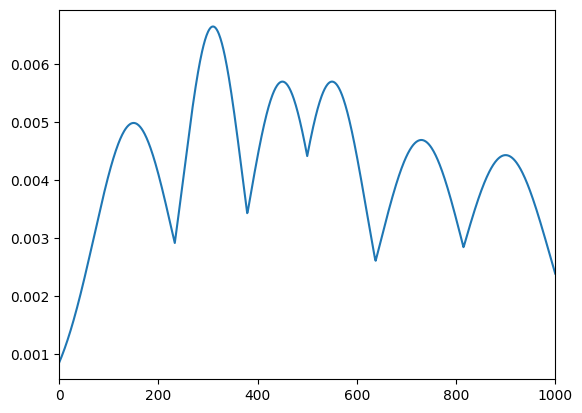

In [181]:
dists = [(150, 80), (310, 60), (450, 70), (550, 70), (730, 85), (900, 90)]
coords = np.arange(0, 1001)
volumes = np.zeros_like(coords, dtype=float)

# формирование кривой плотности
for coord in coords:
    temp = []
    for (m, s) in dists:
        temp.append(norm(coord, m, s))
    volumes[coord] += max(temp)
    
plt.plot(volumes)
plt.xlim(0, 1000);    

In [182]:
# считаем попарный объем покрытия
result = []
window = 100
for c1 in range(window, len(coords)-(3*window)):
    for c2 in range(c1+2*window, len(coords)-window):
        s1 = volumes[c1-window: c1+window].sum()
        s2 = volumes[c2-window: c2+window].sum()
        result.append((c1, c2, s1+s2))

c1, c2, value = max(result, key=lambda x: x[2])
c1, c2, value        

(256, 500, 2.0489110217898885)

In [184]:
volumes[(coords >= c1-window) & (coords < c1+window)].sum() + \
volumes[(coords >= c2-window) & (coords < c2+window)].sum()

2.0489110217898885

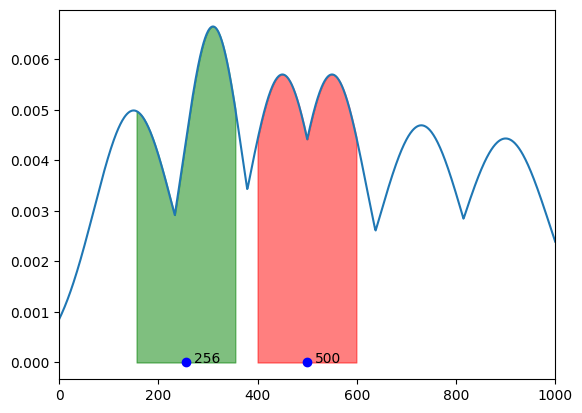

In [196]:
plt.plot(volumes)
plt.fill_between(coords, volumes, where = (coords >= c1-window) & (coords < c1+window), color='g', alpha=.5)
plt.fill_between(coords, volumes, where = (coords >= c2-window) & (coords < c2+window), color='r', alpha=.5)
plt.plot(c1, 0, 'bo') 
plt.plot(c2, 0, 'bo') 
plt.annotate(f'{c1}', xy=(c1+15, 0))
plt.annotate(f'{c2}', xy=(c2+15, 0))
plt.xlim(0, 1000);

# K. Весы и гири

Есть чашечные весы и набор гирь. Будем говорить, что с помощью набора гирь возможно взвесить массу **m**, если можно поставить гири на весы так (не обязательно все), чтобы разница в весе чаш равнялась **m**.

Задается число **n**. Можно с помощью предложенного набора гирь взвесить все целые величины масс от 1 до **n**?

Например: пусть набор [1,3,4] и **n**=5. То разница весов 1, 3 и 4 достигается соответствующими гирями, 2 можно получить как 3 на одной чаше и 1 на другой, а 5 как 4+1. 

**Ввод:** В первой строке вводится число n (1≤**n**≤108).

Во второй строке вводится набор чисел **wi** через пробел (1≤**wi**≤108). Количество чисел в наборе не превосходит 13. 

**Вывод:** Вывести Yes, если можно взвесить любую массу от 1 до **n**, иначе выведите No. 

---

In [208]:
%%time
 
from itertools import combinations

# загрузка данных
filename = 'data/giri.txt'
with open(filename) as f:
    for i, line in enumerate(f):
        line = line.strip()
        if i == 0:
            N = int(line)
        giri = list(map(int, line.split())) 

# создание всех возможных комбинаций сумм и разностей гирь
sums = set()
diffs = set()

for r, _ in enumerate(giri, 1):
    for combo in combinations(giri, r):
        s1 = sum(combo)
        sums.add(s1)
        set2 = set(giri).difference(set(combo))
        d = [abs(sum(combo2)-s1) for r, _ in enumerate(set2, 1) for combo2 in combinations(set2, r)]
        diffs.update(d)

# основной цикл
for n in range(1, N+1):
    if n not in sums and n not in diffs:
        print('No')
        break        
else:
    print('Yes')   
#     ...

Yes
CPU times: total: 15.6 ms
Wall time: 3 ms


# L. N-гранные кубики

Компания из N человек играет в игру с N−гранными кубиками; каждый участник бросает кубик, получая число от 1 до N. Участники разбиваются на всевозможные пары, в каждой паре людей с совпавшими гранями оба игрока получают столько очков, сколько выпало. После этого у каждого участника вычитаются баллы в размере квадрата количества людей с той же выпавшей гранью.

Например, для N=3 при выпавших гранях [1, 2, 2] суммарное число очков будет 4−2∗2^2−1^2=−5, а при [2, 2, 2] будет 12−3∗3^2=−15

Найдите математическое ожидание суммарно набранного числа очков при N=50

---

## Решение через сочетания

Суммарное число очков для всевозможных комбинаций: 
$$S = \sum_{n=1}^{N}\sum_{k=1}^{N}C_{kn}\cdot S_{kn}$$
Где $n$ - число на грани кубика; $k$ - частота выпадания грани $n$;

Количество комбинаций, в которых грань $n$ встречается $k$ раз: 
$$C_{kn}=C_{N}^{k}\cdot\overline{A}_{N-1}^{N-k}$$

Сумма очков для грани $n$ с частотой $k$:
$$S_{kn} = (2 \cdot n \cdot C_{k}^{2}   - k\cdot k^{2})$$

$C_{k}^{2}$ - кол-во сочетаний без повтора всевозможных пар из $k$ элементов;

$C_{N}^{k}$ - кол-во сочетаний без повтора комбинаций с гранью $n$ с частотой $k$;

$\overline{A}_{N-1}^{N-k}$ - кол-во размещений с повтором сочетания с частотой $k$;

Математическое ожидание суммарного числа очков:
$$E(S) = \sum_{n=1}^{N}\sum_{k=1}^{N}P_{kn}\cdot S_{kn}$$

где $P_{kn} = \frac{C_{kn}}{m}$ - вероятность грани $n$ c частотой $k$;

$m$ - суммарное кол-во вcевозможных комбинаций кубика 

## Решение через Бернулли

Математическое ожидание суммарного числа очков через Бернулли:
$$E(S) = \sum_{n=1}^{N}\sum_{k=1}^{N}P_{kn}^{bernulli}\cdot S_{kn}$$

$P_{kn}^{bernulli}=C_{N}^{k}\cdot p^{k}\cdot (1-p)^{N-k}$ - вероятность выпадание $n$ грани $k$ раз

$p=1/N$ - вероятность каждой грани

In [211]:
def bernulli(p, n, k):
    return math.comb(n, k) * pow(p, k) * pow((1 - p), (n - k))

N = 50

math_expect = 0
for n in range(1, N+1):
    for k in range(1, N+1):
        combo_pair = math.comb(k, 2)
        s = (combo_pair * n * 2 - k * pow(k, 2))  
        p = bernulli(p=1/N, n=N, k=k)
        math_expect += p * s
        
print('Мат. ожидание очков:', math_expect)

Мат. ожидание очков: 1005.4599999999983


# M. DJ Паша

Паша готовится к вечеринке и составляет плейлист из хип хоп музыки. Он не хочет брать заезженные треки и ищет что-то новенькое, что он раньше не слышал.

Паша включил поток по неизвестным трекам в Яндекс Музыке и отбирает плейлист. Он посчитал, что неизвестный трек становится для него любимым с вероятностью 20%.

И из любимых в среднем каждый 3 трек в жанре хип хоп.

Паша пытается понять, сколько ему нужно выделить времени, чтобы составить классный хип-хоп плейлист. Помогите ему посчитать, сколько в среднем нужно потратить времени, чтобы услышать один любимый хип-хоп трек, если в среднем один музыкальный трек длится 2 минуты 45 секунд.

**Вывод:** Среднее количество секунд, которое нужно потратить, чтобы полностью прослушать любимый хип-хоп трек.


---

[Полная вероятность](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B0_%D0%BF%D0%BE%D0%BB%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8)

In [3]:
p_love = 0.2
p_hop_love = 1 / 3
t_mean = 2 * 60 + 45

t_mean / (p_hop_love * p_love) 

2475.0

# N. Поехавшие фичи



Команда Яндекс Поиска проводит AB эксперимент с изменением логики показа рекламы.

По результатам эксперимента аналитики заметили, что сильно поменялись метрики ранжирования, которые не должны были поменяться в этом эксперименте. Разработчик Коля подозревает, что бага в коде могла задеть рассчет некоторых фичей для формулы ранжирования. Причем эта бага никак не влияет на среднее и дисперсию распределения отдельных фичей, но затрагивает саму форму распределения.

Коля просит вас помочь найти индексы фичей, которые были затронуты багом.

**Ввод:** 

Логи можно скачать по ссылке из Яндекс Диска https://disk.yandex.ru/d/JxIEAT4WCULb9A

В каждой строке файла логов записано 4 числа
$ni, testidi, indi, feati$

1≤**ni**≤15- номер дня проведения АБ эксперимента

1≤**testidi**≤2 - номер выборки

0≤**indi**<1500 - индекс фичи в формуле ранжирования

−10^23≤**feati**≤10^23 - значение фичи в формуле ранжирования

**Вывод:** Выведите 10 чисел в порядке возрастания через запятую без пробелов - индексы фичей, затронутых багом.

---

Замечания:
+ Датасет большой, поэтому используем dask вместо pandas
+ В качестве меры формы распределения будем использовать ассиметрию и эксцесс

[Skewness and Kurtosis in Statistics](https://medium.com/swlh/skewness-and-kurtosis-in-statistics-a0314c8882d7)

In [4]:
import pandas as pd
import dask.dataframe as dd

In [7]:
df = dd.read_csv('data\dataset.tsv', sep='\t', header=None)
df.head()

,0,1,2,3
0,3,1,0,4.946383
1,15,1,0,5.094175
2,2,1,0,4.610773
3,7,1,0,4.733779
4,8,1,0,4.790034


Разбиваем на 2 выборки и считаем среднее и дисперсию

In [30]:
df_A = df[df[1] == 1]
df_A = df_A.drop(1, axis=1)

df_B = df[df[1] == 2]
df_B = df_B.drop(1, axis=1)

mean_var_A = df_A.groupby([2])[3].agg(['mean', 'var']).compute()
mean_var_B = df_B.groupby([2])[3].agg(['mean', 'var']).compute()

mean_var_A.head()

,mean,var
2,,
0,4.880257,0.011483
1,3.606224,195.065026
2,2.216175,197.602204
3,3.726099,14.240315
4,-1.597642,4.339587


Считаем изменения по среднему и дисперсии. Оставляем только те фичи, в которых изменения малы

In [27]:
eps = 0.5 # порог, при котором изменение считаем значимым

diffs = ((mean_var_A - mean_var_B) / mean_var_A * 100).abs()
diffs = diffs[(diffs['mean'] < eps) & (diffs['var'] < eps)]

print(len(diffs))

87


Считаем kurt и skew для отфильрованных на предыдущем шаге фич

In [29]:
df_clip = df[df[2].isin(diffs.index)].compute()

df_kurt_skew = df_clip.groupby([1, 2])[3] \
                      .apply(lambda x: pd.Series([x.kurt(), x.skew()], 
                                                 index=['kurt', 'skew'])) \
                      .unstack()
df_kurt_skew

kurt      skew
1 2                      
1 7   -1.190240  0.005512
  38   6.766846  2.060919
  90  -1.192684  0.001179
  115  5.825064  1.983637
  118 -1.198400 -0.012439

Оставляем фичи, в которых изменения велики

In [28]:
eps = 5 # порог, при котором изменение считаем значимым

diffs2 = ((df_kurt_skew.loc[1] - df_kurt_skew.loc[2]) / df_kurt_skew.loc[1] * 100).abs()
diffs2 = diffs2[(diffs2['kurt'] > eps) | (diffs2['skew'] > eps)]

print(len(diffs2))

80


In [26]:
','.join(map(str, diffs2.index[:10]))

'7,38,90,115,197,206,209,235,237,243'